## Below code is for getting figure in center alignment

In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}

</style>
""")

## Import Basic Modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## Reading CSV file

In [3]:
df = pd.read_csv("datasets_13720_18513_insurance(1).csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### For smote approach we take one variable df_smogn so that our model should not be bias

In [4]:
import smogn

df_smogn = smogn.smoter(
    
    data = df,  # pandas dataframe
    y = 'charges'  # string ('header name')
)

r_index: 100%|######################################################################| 186/186 [00:01<00:00, 135.78it/s]


### For applying new approaches for that we have to copy original dataset into differet variable

In [5]:
df1 = df.copy()

## Getting information of dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Getting statistic information of dataset

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Checking Null value present in dataset

In [8]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Checking duplicate values

In [9]:
duplicate = df[df.duplicated()] 
duplicate

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


## Removing duplicate values

In [10]:
df.drop_duplicates(inplace=True)

# Data Analysis

## Smoker analysis

In [11]:
num_smoker = pd.DataFrame(df["smoker"].value_counts())
num_smoker.rename(columns={"smoker":"Smoker Count"},inplace=True)
num_smoker_percent = pd.DataFrame(round((df["smoker"].value_counts()/df.shape[0] *100),3))
num_smoker_percent.rename(columns={"smoker":"Smoker Count in Percent"},inplace=True)
smoker = pd.concat([num_smoker,num_smoker_percent],axis=1)
print("\033[1m\nSmoker analysis in dataset\n")
smoker


Smoker analysis in dataset



,Smoker Count,Smoker Count in Percent
no,1063,79.506
yes,274,20.494


In [12]:
df["smoker"].value_counts()/df.shape[0] * 100

no     79.506358
yes    20.493642
Name: smoker, dtype: float64

In [13]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

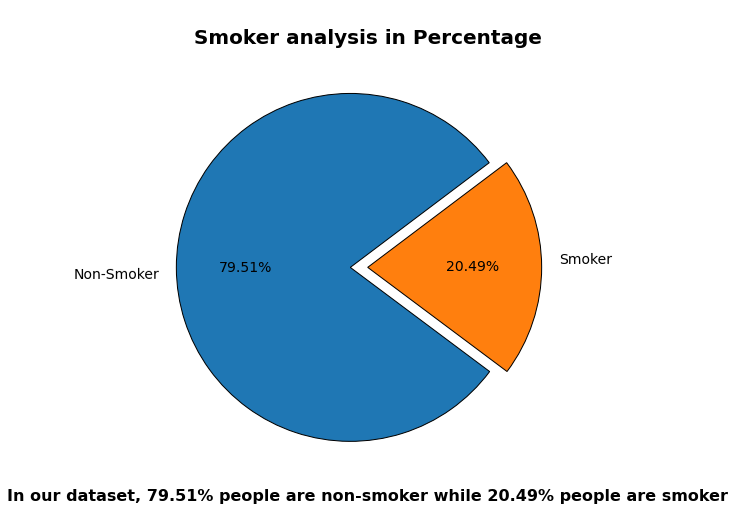

In [14]:
percent=[]
for i in df['smoker'].value_counts():
    percent.append(i)
    
wedgeprops = {"linewidth": 1, 'width':1, "edgecolor":"k"}
textprops = {"fontsize":14}
explode = [0.1,0]
plt.figure(figsize = (8,8))
plt.pie(percent,labels = ["Non-Smoker","Smoker",],explode = explode, autopct = "%0.2f%%", startangle = 37,
        wedgeprops = wedgeprops,textprops = textprops,rotatelabels=True) 
plt.title("\nSmoker analysis in Percentage",fontsize=20,fontweight='bold')
plt.xlabel("In our dataset, 79.51% people are non-smoker while 20.49% people are smoker",fontsize=16,fontweight='bold')
plt.show()


## BMI Analysis

In [15]:
num_bmi = pd.DataFrame(df["bmi"].value_counts())
num_bmi.rename(columns={"bmi":"BMI Count"},inplace=True)
num_bmi_percent = pd.DataFrame(round((df["bmi"].value_counts()/df.shape[0] *100),3))
num_bmi_percent.rename(columns={"bmi":"BMI Count in Percent"},inplace=True)
bmi = pd.concat([num_bmi,num_bmi_percent],axis=1)
print("\033[1m\nTop 5 Persons BMI Count are given below\n")
print(f"\033[34m{bmi.head(5)}")


Top 5 Persons BMI Count are given below

       BMI Count  BMI Count in Percent
32.30         13                 0.972
28.31          9                 0.673
30.80          8                 0.598
34.10          8                 0.598
28.88          8                 0.598


 Person whose BMI is 32.300 are more in number in our dataset and their count is 13


In [16]:
print("\033[1m\nBottom 5 Persons BMI Count are given below\n")
print(f"\033[34m{bmi.tail(5)}")


Bottom 5 Persons BMI Count are given below

        BMI Count  BMI Count in Percent
44.745          1                 0.075
26.070          1                 0.075
27.300          1                 0.075
37.715          1                 0.075
29.200          1                 0.075


 Above BMI of persons are less in counts

## Age Analysis

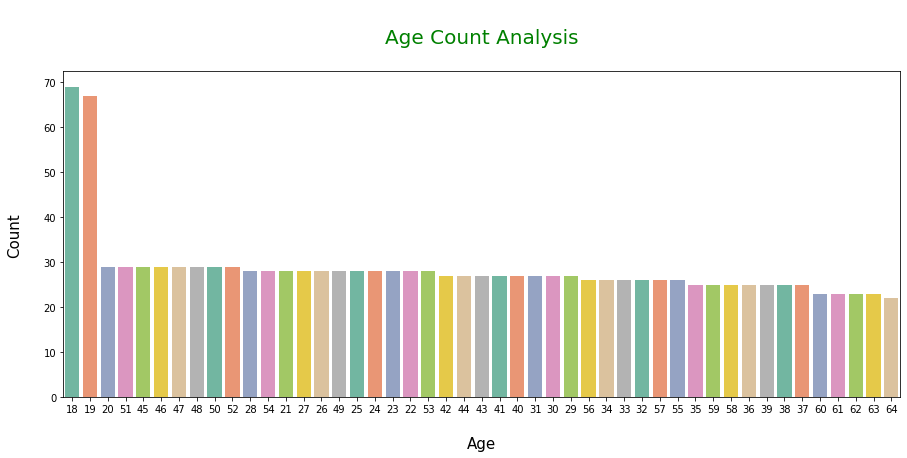

In [17]:
plt.figure(figsize=(15,6))
sns.countplot(df["age"],order = df['age'].value_counts().index,palette="Set2")
plt.xlabel("\nAge",fontsize=15)
plt.ylabel("Count\n",fontsize=15)
title = plt.title("\nAge Count Analysis\n",fontsize=20)
plt.setp(title,c="g")
plt.show()

In our data set, 18 & 19 year old people are more compare to other ages

64 year old people are less in number

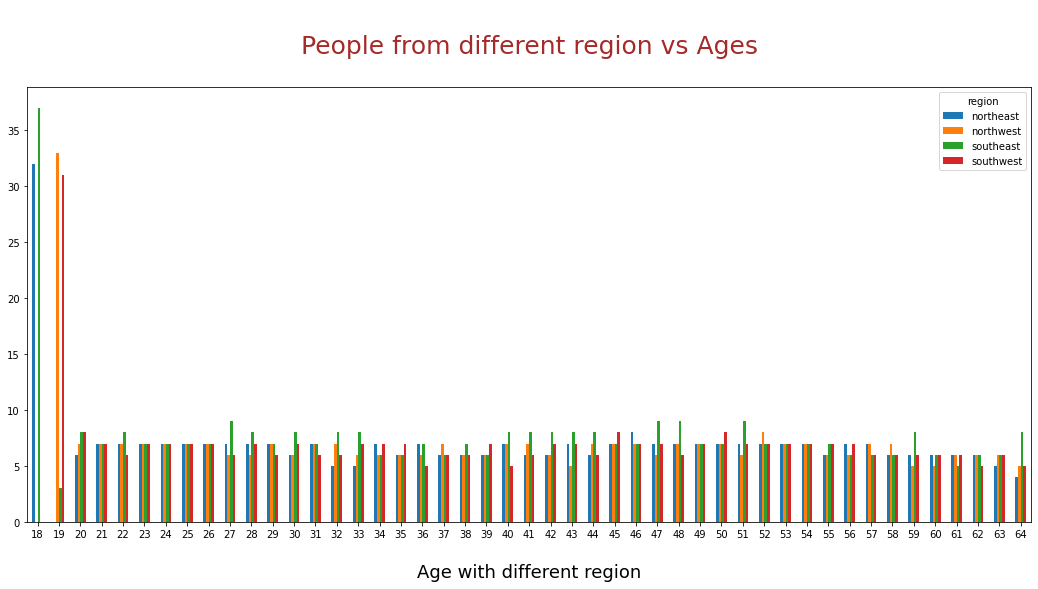

In [18]:
age_vs_region = df.groupby("age").region.value_counts().sort_values(ascending=False)
age_vs_region.unstack().plot(kind="bar",figsize=(18,8),width=0.5)
title = plt.title("\nPeople from different region vs Ages\n",fontsize=25)
plt.setp(title,c="Brown")
plt.xlabel("\nAge with different region",fontsize=18)
plt.xticks(rotation=0)
plt.show()

 From the figure, 18 year old people are belonging from southeast & northeast region and 19 year old people are belonging from northwest & southwest region.

Most of the other ages people are more belonging from southeast region

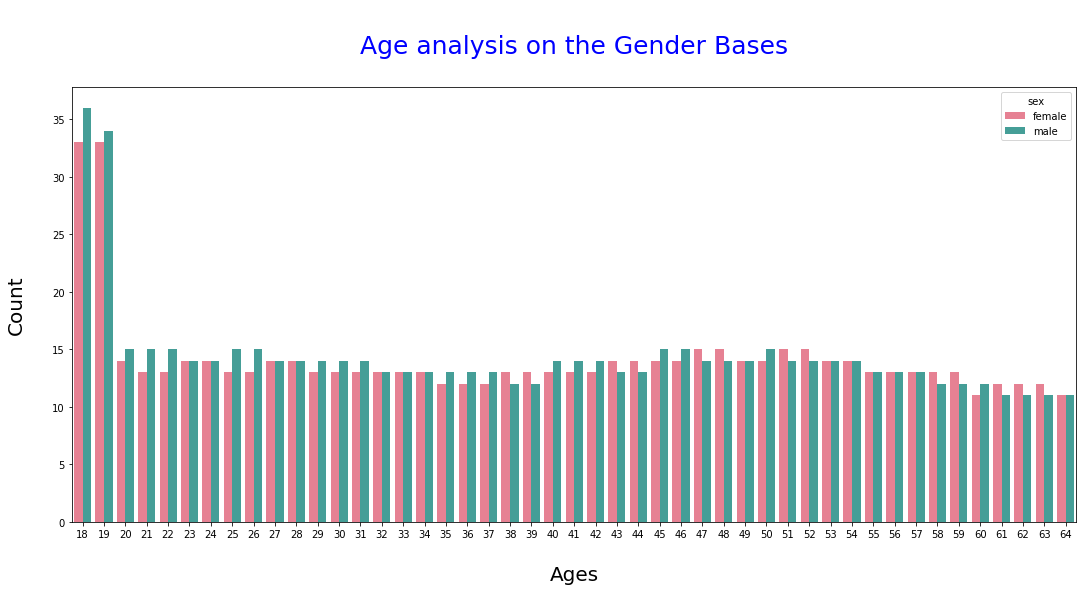

In [19]:
plt.figure(figsize=(18,8))
sns.countplot(df["age"],hue=df["sex"],palette="husl")
plt.xlabel("\nAges",fontsize=20)
plt.ylabel("Count\n",fontsize=20)
title = plt.title("\nAge analysis on the Gender Bases\n",fontsize=25)
plt.setp(title,c="b")
plt.show()

18 & 19 year old peoples are more number of male as compare to female

23,24,27,28,32,33,34,49,53,54,55,56,57 & 64 year old people are same number of male and female

38,39,43,44,47,48,51,52,58,59,61,62 & 63 year old people are more number of female as compare to male

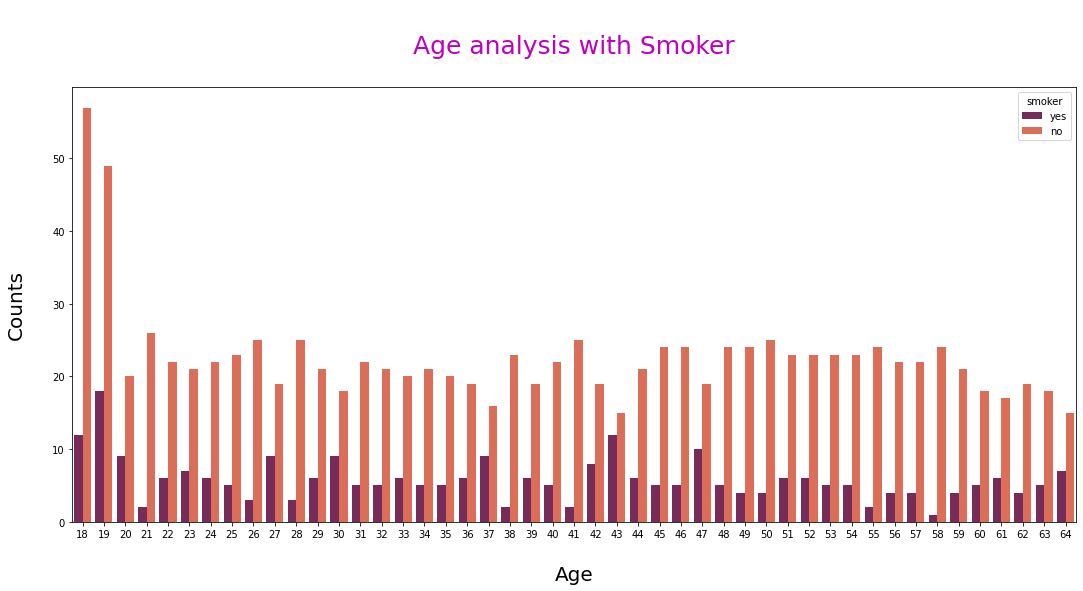

In [20]:
plt.figure(figsize=(18,8))
sns.countplot(df["age"],hue=df["smoker"],palette="rocket")
plt.xlabel("\nAge",fontsize=20)
plt.ylabel("Counts\n",fontsize=20)
title = plt.title("\n Age analysis with Smoker \n",fontsize=25)
plt.setp(title,c="m")
plt.show()

from above figure, our dataset consist less number of smoker in all different ages group

In 19 years of age group peoples ,more number of smoker is present compared to other groups

In 58 years of age group people, less number of smoker is present compared to other groups

## We are more interested in our target variable vs feature variable

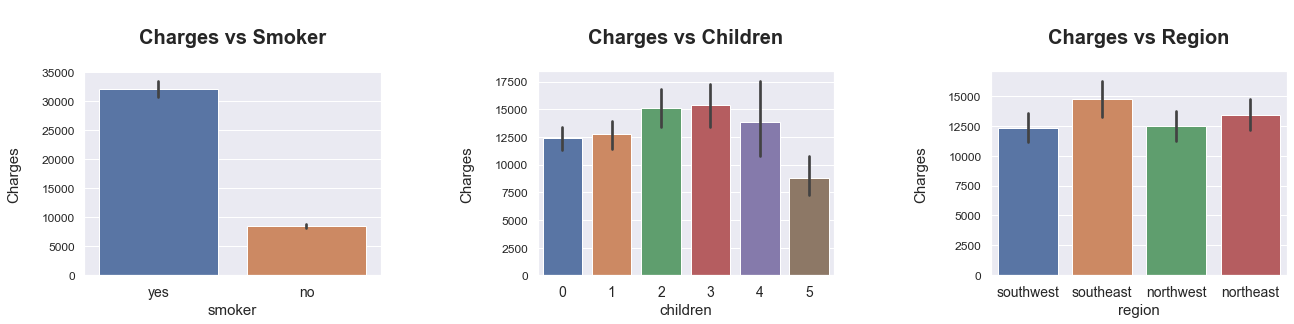

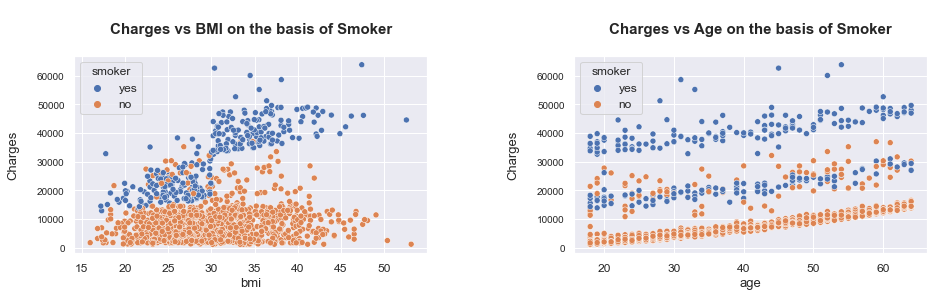

In [21]:
plt.figure(figsize=(20,15))
sns.set(rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":15,"xtick.labelsize":14,"ytick.labelsize":12,
            "legend.fontsize":12})

plt.subplot(3, 3, 1)
sns.barplot(df["smoker"],df["charges"])
plt.title("\nCharges vs Smoker\n",fontweight="bold")
plt.ylabel("Charges\n")

plt.subplot(3, 3, 2)
sns.barplot(df["children"],df["charges"])
plt.title("\nCharges vs Children\n",fontweight="bold")
plt.ylabel("Charges\n")

plt.subplot(3, 3, 3)
sns.barplot(df["region"],df["charges"])
plt.title("\nCharges vs Region\n",fontweight="bold")
plt.ylabel("Charges\n")
plt.tight_layout(pad=4)
plt.show()

plt.figure(figsize=(15,10))

sns.set(rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":13,"xtick.labelsize":12,"ytick.labelsize":10,
            "legend.fontsize":12})

plt.subplot(2, 2, 1)
sns.scatterplot(df["bmi"],df["charges"],hue=df["smoker"])
plt.title("\nCharges vs BMI on the basis of Smoker\n",fontsize=15,fontweight="bold")
plt.ylabel("Charges\n")

plt.subplot(2, 2, 2)
sns.scatterplot(df["age"],df["charges"],hue=df["smoker"])
plt.title("\nCharges vs Age on the basis of Smoker\n",fontsize=15,fontweight="bold")
plt.ylabel("Charges\n")

plt.tight_layout(pad=4)
plt.show()


From above figure,<br>
1) For the smoker person,charges are high & for non-smoker person,charges are low<br>
2) The people belongs from the southeast region then the charges are high for them<br>
3) As the age increases then charges are also increases

# Brief Summary from the dataset

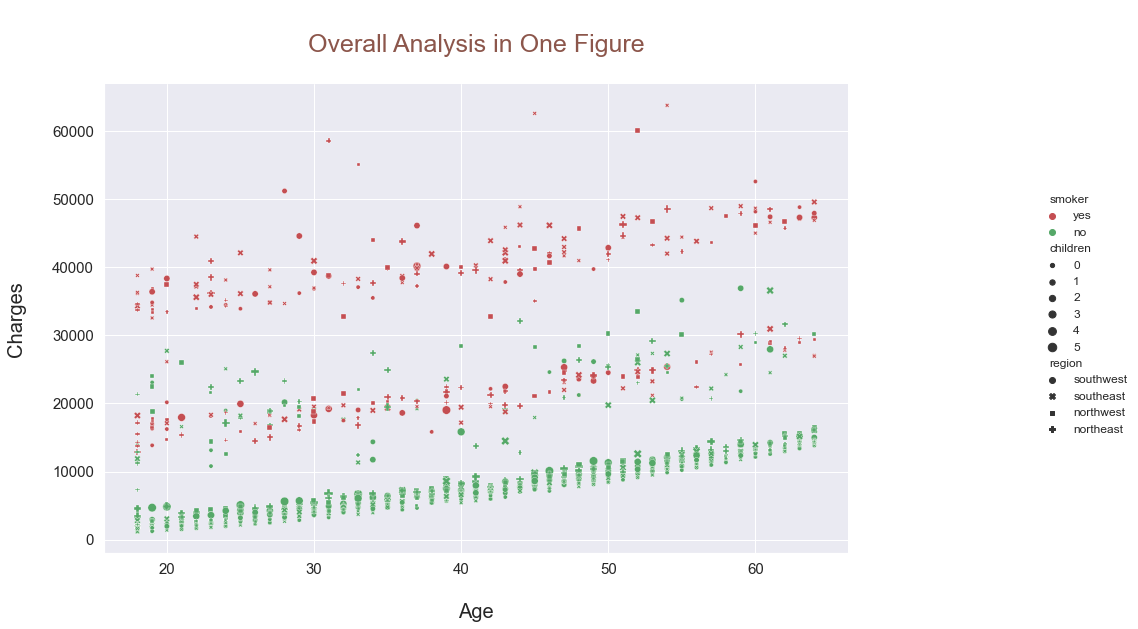

In [22]:
sns.set(rc={"font.size":20,"axes.titlesize":25,"axes.labelsize":20,"xtick.labelsize":15,"ytick.labelsize":15,
            "legend.fontsize":12})
figure =sns.relplot(df["age"],df["charges"],hue=df["smoker"],style=df["region"],palette=["r","g"],size=df["children"])
plt.setp(figure._legend.get_title(), fontsize=20)
figure.fig.set_size_inches(18, 8)
plt.xlabel("\nAge")
plt.ylabel("Charges\n")
title = plt.title("\nOverall Analysis in One Figure\n")
plt.setp(title,c="tab:brown")
plt.show()

### From above figure we conclude are as given below

As the age increases ,then  insurance cost also increases

If the person age is less and the person is non-smoker then insurance cost will be minimum.

As the per age increases and the person is non-smoker then insurance cost gradually increases.

If the person is smoker and his/her age is less then insurance cost will be more compare to non smoker person

If the number of dependencies/children are more and the person is smoker then insurance price will be more.


# Data Preprocessing

### Getting Numerical type data

In [23]:
num_data = df.select_dtypes(exclude="object")
num_data.head(5)

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


### Getting Numerical Column name

In [24]:
num_data.columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

### Statistical Analysis of Numerical type data


                                             Statistical Analysis of Numerical type data                                              



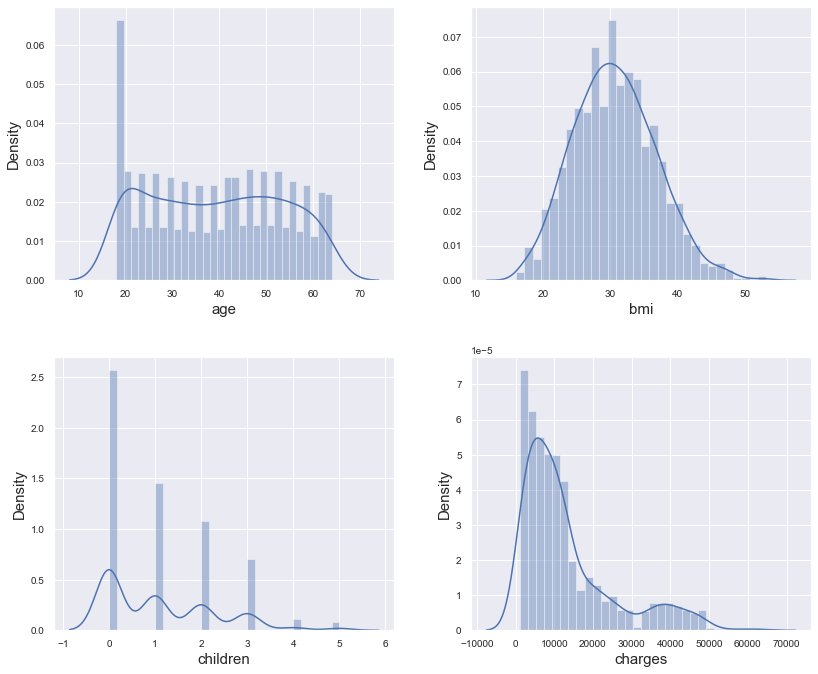

In [25]:
sns.set(rc={"font.size":15,"axes.titlesize":20,"axes.labelsize":15,"xtick.labelsize":10,"ytick.labelsize":10,
            "legend.fontsize":12})
plt.figure(figsize=(12,10))

txt = "Statistical Analysis of Numerical type data"
x = txt.center(134)
print(f"\033[1m\n{x}\n")

for index,cols in enumerate(num_data):
    plt.subplot(2,2,index+1)
    sns.distplot(num_data.loc[:,cols],kde=True,bins=30)
plt.tight_layout(pad=2)

From the figure, the <b> Children & Charges</b> are observed as <b>Right Skew data <b>

### Checking Skewness & Kurtosis of Numerical type data

In [26]:
print("\033[1mRange of skewness & kurtosis for considering it as normal distribution --> -1.96 < S < 1.96\n")
print(f"Skewness of age: {stats.skew(df.age)}\n")
print(f"Skewness of bmi: {stats.skew(df.bmi)}\n")
print(f"Skewness of children: {stats.skew(df.children)}\n")
print(f"Skewness of charges: {stats.skew(df.charges)}\n\n")
print(f"Kurtosis of age: {stats.kurtosis(df.age)}\n")
print(f"Kurtosis of bmi: {stats.kurtosis(df.bmi)}\n")
print(f"Kurtosis of children: {stats.kurtosis(df.children)}\n")
print(f"Kurtosis of charges: {stats.kurtosis(df.charges)}\n")

Range of skewness & kurtosis for considering it as normal distribution --> -1.96 < S < 1.96

Skewness of age: 0.054719294607049676

Skewness of bmi: 0.2835955670169306

Skewness of children: 0.9363686100859417

Skewness of charges: 1.5136902413349014


Kurtosis of age: -1.2442418566306097

Kurtosis of bmi: -0.05723370910000947

Kurtosis of children: 0.19571940948273436

Kurtosis of charges: 1.5937433292737193



### Getting Categorical Data

In [27]:
cat_data = df.select_dtypes(include="object")
cat_data.head(5)

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest



### Getting Categorical Data Column

In [28]:
cat_data.columns

Index(['sex', 'smoker', 'region'], dtype='object')



### Statistical Analysis of Categorical type data


                                         Statistical Analysis of Categorical type data                                          



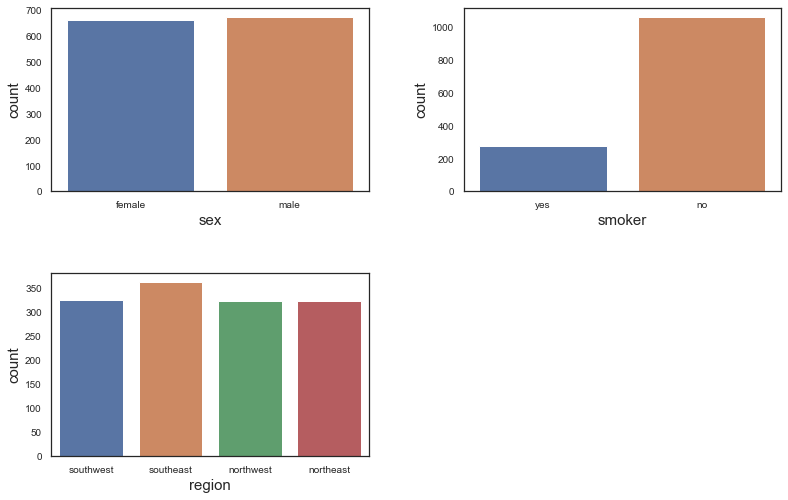

In [29]:
fig = plt.figure(figsize=(12,8))

txt = "Statistical Analysis of Categorical type data"
x = txt.center(128)
print(f"\033[1m\n{x}\n")
sns.set_style("white")
for index in range(len(cat_data.columns)):
    plt.subplot(2,2,index+1)
    sns.countplot(x = cat_data.iloc[:,index])
fig.tight_layout(pad=3)

From above figure

1) The <b>Smoker</b> column consists of more number of non-smoker & less number of smoker.

2) In <b>Region</b> column , the southeast region is slightly more than others region.

3) In <b>Sex</b> column, both male & female are equal in numbers.

## Checking Outliers


                                                 Checking Outlier in Numerical data                                                



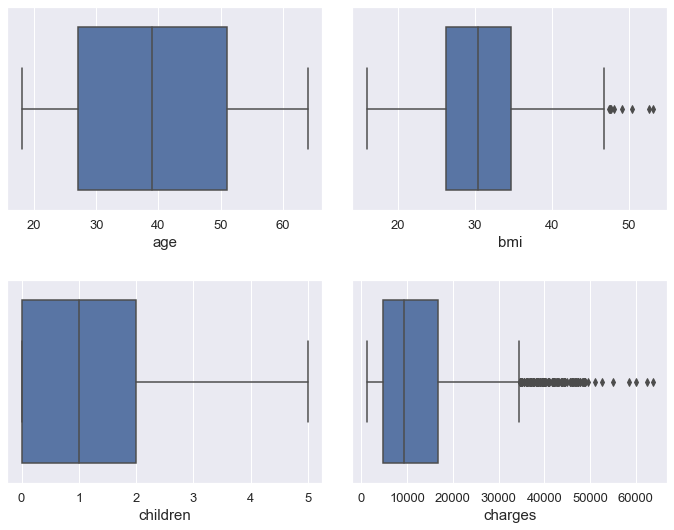

In [30]:
sns.set(rc={"font.size":15,"axes.titlesize":20,"axes.labelsize":15,"xtick.labelsize":13,"ytick.labelsize":13,
            "legend.fontsize":12})
plt.figure(figsize=(10,8))

txt = "Checking Outlier in Numerical data"
x = txt.center(131)
print(f"\033[1m\n{x}\n")

for index,cols in enumerate(num_data):
    plt.subplot(2,2,index+1)
    sns.boxplot(num_data.loc[:,cols])
plt.tight_layout(pad=2)

BMI & Charges have outliers

## Treatment on Outlier

#### Charges outlier

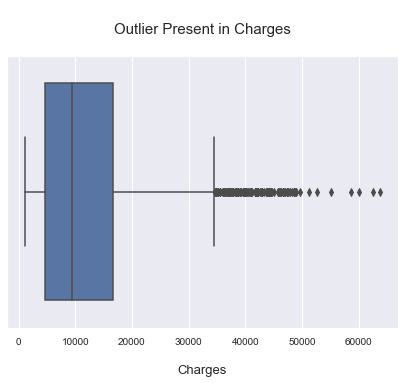

In [31]:
plt.figure(figsize=(7,5))
sns.set_style("darkgrid")
sns.boxplot(df["charges"])
plt.title("\nOutlier Present in Charges\n",fontsize=15)
plt.xlabel("\nCharges",fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

<b>Outlier value present in Charges using z-score method</b>

In [32]:
mean = np.mean(df["charges"]) 
std = np.std(df["charges"]) 
threshold = 3.5
outlier = [] 
for i in df["charges"]: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('\033[1mOutlier in charges are ', outlier) 

Outlier in charges are  [63770.42801, 58571.07448, 60021.39897, 62592.87309]


<b>Replace the outlier with proper value</b>

In [33]:
df["charges"] = df["charges"].replace([63770.42801, 58571.074479999996, 60021.39897, 62592.87309],55000)
print(df['charges'].skew())

1.4852802008989987


<b>After replacing the outlier with proper value in Charges </b>

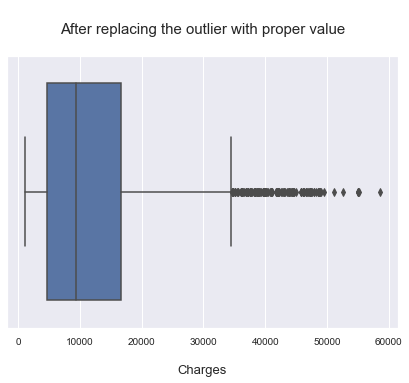

In [34]:
plt.figure(figsize=(7,5))
sns.set_style("darkgrid")
sns.boxplot(df["charges"])
plt.title("\nAfter replacing the outlier with proper value\n",fontsize=15)
plt.xlabel("\nCharges",fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

#### BMI outlier

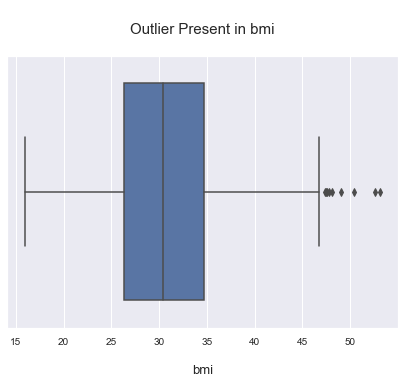

In [35]:
plt.figure(figsize=(7,5))
sns.set_style("darkgrid")
sns.boxplot(df["bmi"])
plt.title("\nOutlier Present in bmi\n",fontsize=15)
plt.xlabel("\nbmi",fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

<b>Outlier value present in BMI using z-score method</b>

In [36]:
mean = np.mean(df["bmi"]) 
std = np.std(df["bmi"]) 
threshold = 3.5
outlier = [] 
for i in df["bmi"]: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('outlier in dataset is', outlier) 

outlier in dataset is [52.58, 53.13]


<b>Replace the outlier with proper value</b>

In [37]:
df["bmi"] = df["bmi"].replace([52.58, 53.13],49)

<b>After replacing the outlier with proper value in BMI </b>

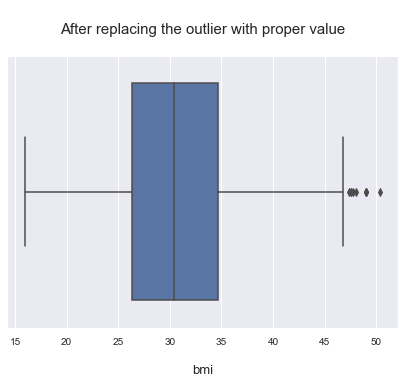

In [38]:
plt.figure(figsize=(7,5))
sns.set_style("darkgrid")
sns.boxplot(df["bmi"])
plt.title("\nAfter replacing the outlier with proper value\n",fontsize=15)
plt.xlabel("\nbmi",fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

## As machine understand binary code so we have to encode it

### Creating the Variable which is a copy of original dataset

In [39]:
new_df = df.copy()
new_df1 = df.copy()
new_df2 = df.copy()

### Importing Label Encoding to encode the categorical data

Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form.In our dataset columns name : <b> sex , smoker , region<b> have object type data so we have to encode it.

In [40]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

new_df[['sex', 'smoker', 'region']] = new_df[['sex', 'smoker', 'region']].apply(label.fit_transform)

### After encoding our dataset looklike

In [41]:
new_df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


## Check Correlation between feature variable & target Variable

Correlation means association - more precisely it is a measure of the extent to which two variables are related. There are three possible results of a correlational study: a positive correlation, a negative correlation, and no correlation.

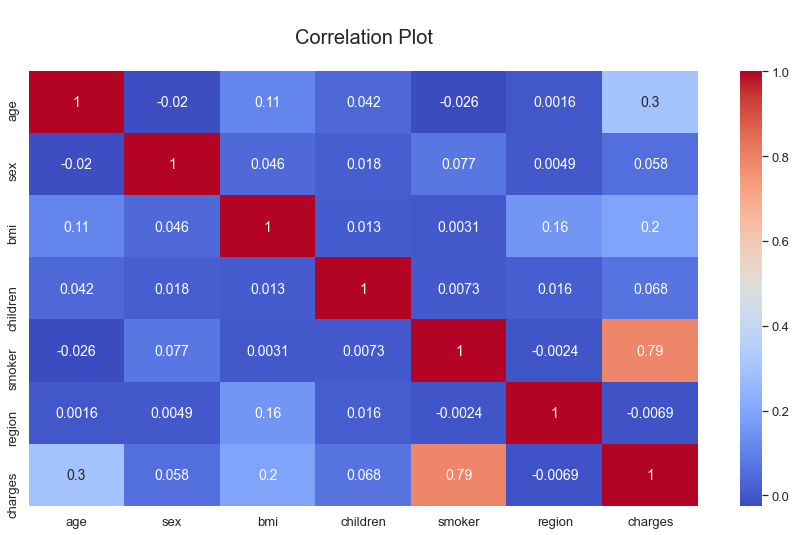

In [42]:
sns.set(rc={"font.size":14,"axes.titlesize":20,"axes.labelsize":15,"xtick.labelsize":13,"ytick.labelsize":13,
            "legend.fontsize":12})
plt.figure(figsize=(15,8))
sns.heatmap(new_df.corr(),annot=True,cmap="coolwarm")
plt.title("\nCorrelation Plot\n")
plt.show()

Smoker and Charges are <b>positively correlated</b><br><br>
whereas Charges and Region are <b>negatively correlated</b><br><br>
Age and Smoker are negitively correlated i.e. age increases smoker decreases<br>

<b>Smoker , age & bmi are impacting the target variable charges</b>

## Defining Feature and Target Vaiable

In [43]:
x = new_df[['age', 'bmi', "smoker"]]
y = new_df[["charges"]]

## Spilting the dataset for trainning & test purpose

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.21,random_state=20)

### Importing the Machine Learning Algorithm

As our target variable data type is continuous so we approach Regression based ml algorithm

In [45]:
from sklearn.ensemble import GradientBoostingRegressor
model =GradientBoostingRegressor()

### Model training 

In [46]:
model.fit(x_train,y_train)

GradientBoostingRegressor()

### Model prediction

In [47]:
y_predict = model.predict(x_test)

### Evalution of model

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('\033[1m\nMean Absolute Error:',mean_absolute_error(y_test,y_predict))
print("Mean Absolute Error tells you how close a regression line is to a set of points.")

print('\nMean Squared Error:',mean_squared_error(y_test,y_predict))
print("Mean Squared Error is the amount of error in your measurements.")

print('\nr2_score:',r2_score(y_test,y_predict))
print("r2_score is a statistical measure of how close the data are to the fitted regression line.")

print("\nRoot mean square error",np.sqrt(mean_absolute_error(y_test,y_predict)))
print('root mean square error is a standard way to measure the error of a model in predicting quantitative data.')


Mean Absolute Error: 2418.0389083903606
Mean Absolute Error tells you how close a regression line is to a set of points.

Mean Squared Error: 17612199.56878625
Mean Squared Error is the amount of error in your measurements.

r2_score: 0.8777506162418428
r2_score is a statistical measure of how close the data are to the fitted regression line.

Root mean square error 49.17355903725457
root mean square error is a standard way to measure the error of a model in predicting quantitative data.


<b>r2_score for training model <b>

In [49]:
y_predict_train = model.predict(x_train)
r2_score(y_train,y_predict_train)

0.8945684993202734

<b>r2_score for test model <b>

In [50]:
y_predict_test = model.predict(x_test)
r2_score(y_test,y_predict_test)

0.8777506162418428

<b>from above results model seems to be good<b>

In [51]:
import statsmodels.api as sm
model1 = sm.OLS(y_train,x_train).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.869
Model:                            OLS   Adj. R-squared (uncentered):              0.869
Method:                 Least Squares   F-statistic:                              2329.
Date:                Tue, 13 Apr 2021   Prob (F-statistic):                        0.00
Time:                        15:58:23   Log-Likelihood:                         -10767.
No. Observations:                1056   AIC:                                  2.154e+04
Df Residuals:                    1053   BIC:                                  2.155e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          186.9557     13.264     14.095      0.000     160.928     212.983
bmi           50.9081     17.766      2.866      0.004      16.048      85.768
smoker      2.313e+04    489.752     47.233      0.000    2.22e+04    2.41e+04
==============================================================================
Omnibus:                      207.383   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              421.009
Skew:                           1.125   Prob(JB):                     3.79e-92
Kurtosis:                       5.122   Cond. No.                         124.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Hyper parameter tunning

In [52]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor() # Hyper parameter tunning

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

parameters = {'learning_rate':[0.01,0.03,0.06,0.09,0.1,0.3,0.5],
              'max_depth':[2,3,4,5,10],
           'n_estimators':[50,100,150,200],
            "random_state":[0,10,20,30,40,45],
            'min_samples_leaf' : [1,2,3,4,5],
            'warm_start':[True,False],
              "subsample":[0.1,0.2,0.3,0.5,0.7,0.8,0.9]
           } 
#grid = GridSearchCV(model,parameters, cv=5,verbose=1)
grid = RandomizedSearchCV(model, parameters,cv=5, verbose=1)
grid.fit(x_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    9.8s finished


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.01, 0.03, 0.06,
                                                          0.09, 0.1, 0.3, 0.5],
                                        'max_depth': [2, 3, 4, 5, 10],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'n_estimators': [50, 100, 150, 200],
                                        'random_state': [0, 10, 20, 30, 40, 45],
                                        'subsample': [0.1, 0.2, 0.3, 0.5, 0.7,
                                                      0.8, 0.9],
                                        'warm_start': [True, False]},
                   verbose=1)

In [53]:
grid.best_params_

{'warm_start': True,
 'subsample': 0.8,
 'random_state': 0,
 'n_estimators': 50,
 'min_samples_leaf': 5,
 'max_depth': 2,
 'learning_rate': 0.1}

### After Hyper parameter tunning importing ML algorithm

In [54]:
from sklearn.ensemble import GradientBoostingRegressor
model_1 =GradientBoostingRegressor(learning_rate=0.1,max_depth=3,n_estimators=100,random_state=20,subsample=0.9,
                                 min_samples_leaf=4,warm_start=True)

#model_1 =GradientBoostingRegressor(learning_rate=0.03,max_depth=10,n_estimators=100,random_state=0,subsample=0.2,
                                 #min_samples_leaf=5,warm_start=False)

### Model training 

In [55]:
model_1.fit(x_train,y_train)

GradientBoostingRegressor(min_samples_leaf=4, random_state=20, subsample=0.9,
                          warm_start=True)

### Model prediction

In [56]:
y_predict_1 = model_1.predict(x_test)

### Evalution of model after hyper parameter tunning

In [57]:
print('\033[1m\nMean Absolute Error:',mean_absolute_error(y_test,y_predict_1))
print("Mean Absolute Error tells you how close a regression line is to a set of points.")

print('\nMean Squared Error:',mean_squared_error(y_test,y_predict_1))
print("Mean Squared Error is the amount of error in your measurements.")

print('\nr2_score:',r2_score(y_test,y_predict_1))
print("r2_score is a statistical measure of how close the data are to the fitted regression line.")

print("\nRoot mean square error",np.sqrt(mean_absolute_error(y_test,y_predict_1)))
print('root mean square error is a standard way to measure the error of a model in predicting quantitative data.')


Mean Absolute Error: 2427.885674884623
Mean Absolute Error tells you how close a regression line is to a set of points.

Mean Squared Error: 17311399.04161765
Mean Squared Error is the amount of error in your measurements.

r2_score: 0.8798385257580206
r2_score is a statistical measure of how close the data are to the fitted regression line.

Root mean square error 49.273579887041116
root mean square error is a standard way to measure the error of a model in predicting quantitative data.


<b>r2_score for training model <b>

In [58]:
y_predict_train1 = model_1.predict(x_train)
r2_score(y_train,y_predict_train1)

0.8867359994227799

<b>r2_score for testing model <b>

In [59]:
y_predict_test1 = model_1.predict(x_test)
r2_score(y_test,y_predict_test1)

0.8798385257580206

<b> The above result is not so good comapre to without hypertune parameter model<b>

<b>Checking adjusted r2_score <b>

In [60]:
import statsmodels.api as sm
model2 = sm.OLS(y_train,x_train).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.869
Model:                            OLS   Adj. R-squared (uncentered):              0.869
Method:                 Least Squares   F-statistic:                              2329.
Date:                Tue, 13 Apr 2021   Prob (F-statistic):                        0.00
Time:                        15:58:34   Log-Likelihood:                         -10767.
No. Observations:                1056   AIC:                                  2.154e+04
Df Residuals:                    1053   BIC:                                  2.155e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          186.9557     13.264     14.095      0.000     160.928     212.983
bmi           50.9081     17.766      2.866      0.004      16.048      85.768
smoker      2.313e+04    489.752     47.233      0.000    2.22e+04    2.41e+04
==============================================================================
Omnibus:                      207.383   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              421.009
Skew:                           1.125   Prob(JB):                     3.79e-92
Kurtosis:                       5.122   Cond. No.                         124.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## We check for model bias approach 

In [61]:
df_smogn.head(5)

,age,sex,bmi,children,smoker,region,charges
0,49,male,23.897408,1,yes,southeast,22097.747317
1,41,male,25.789748,0,no,northwest,23163.643130
2,47,male,27.864836,1,yes,southwest,23652.842912
3,53,female,24.533868,0,no,southeast,24409.211627
4,50,male,23.262660,0,yes,southeast,26408.967451


### Here, we observed after implementation of smoting technique then the size of dataset get reduced

In [62]:
print(f"\n\033[1mThe original dataset shape : {df.shape}\n")
print(f"After smoting technique on original dataset then new shape of dataset: {df_smogn.shape}")


The original dataset shape : (1337, 7)

After smoting technique on original dataset then new shape of dataset: (1096, 7)


In [63]:
print("\033[1mChecking the original dataset smoker column\n")
print(df["smoker"].value_counts())
print("\033[1m\nAfter balancing the original dataset smoker column\n")
print(df_smogn["smoker"].value_counts())

Checking the original dataset smoker column

no     1063
yes     274
Name: smoker, dtype: int64

After balancing the original dataset smoker column

yes    577
no     519
Name: smoker, dtype: int64


## Lossing data is not good option but we tried this approach 

<b> Getting Numerical type data <b>

In [64]:
smog_num_data = df_smogn.select_dtypes(exclude="object")
smog_num_data.head(5)

,age,bmi,children,charges
0,49,23.897408,1,22097.747317
1,41,25.789748,0,23163.643130
2,47,27.864836,1,23652.842912
3,53,24.533868,0,24409.211627
4,50,23.262660,0,26408.967451


<b> Checking outlier in numerical data <b>


                                                 Checking Outlier in Numerical data                                                



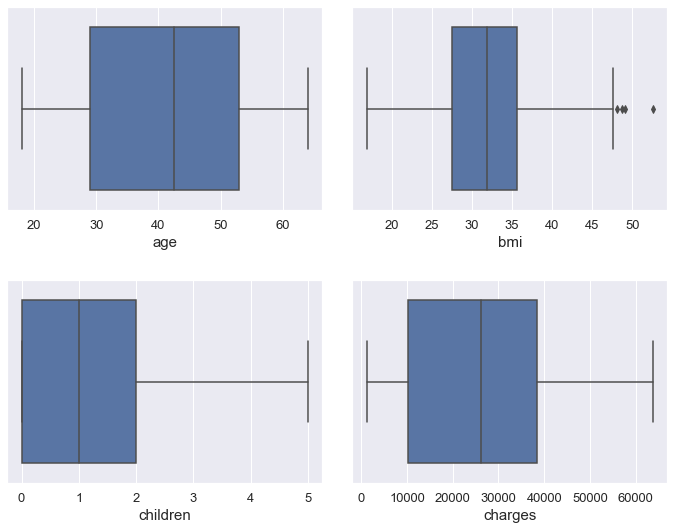

In [65]:
sns.set(rc={"font.size":15,"axes.titlesize":20,"axes.labelsize":15,"xtick.labelsize":13,"ytick.labelsize":13,
            "legend.fontsize":12})
plt.figure(figsize=(10,8))

txt = "Checking Outlier in Numerical data"
x = txt.center(131)
print(f"\033[1m\n{x}\n")

for index,cols in enumerate(smog_num_data):
    plt.subplot(2,2,index+1)
    sns.boxplot(smog_num_data.loc[:,cols])
plt.tight_layout(pad=2)

<b> After apply the smogn technique , charges column have no outlier but the bmi column consists of outlier<b>

In [66]:
mean = np.mean(df_smogn["bmi"]) 
std = np.std(df_smogn["bmi"]) 
threshold = 3.5
outlier = [] 
for i in df_smogn["bmi"]: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('outlier in dataset is', outlier) 

outlier in dataset is [52.58]


<b> Replace the outlier value with specific value <b>

In [67]:
df_smogn["bmi"] = df_smogn["bmi"].replace([52.58, 53.13],51)

<b> Creating a new variable which is copy of df_smogn <b>

In [68]:
new_smogn_df = df_smogn.copy()

<b> Using Label Encoder to encode categorical data <b>

In [69]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

new_smogn_df[['sex', 'smoker', 'region']] = new_smogn_df[['sex', 'smoker', 'region']].apply(label.fit_transform)

new_smogn_df.head(5)


,age,sex,bmi,children,smoker,region,charges
0,49,1,23.897408,1,1,2,22097.747317
1,41,1,25.789748,0,0,1,23163.643130
2,47,1,27.864836,1,1,3,23652.842912
3,53,0,24.533868,0,0,2,24409.211627
4,50,1,23.262660,0,1,2,26408.967451


<b> Checking the correlation between feature and target variable <b> 

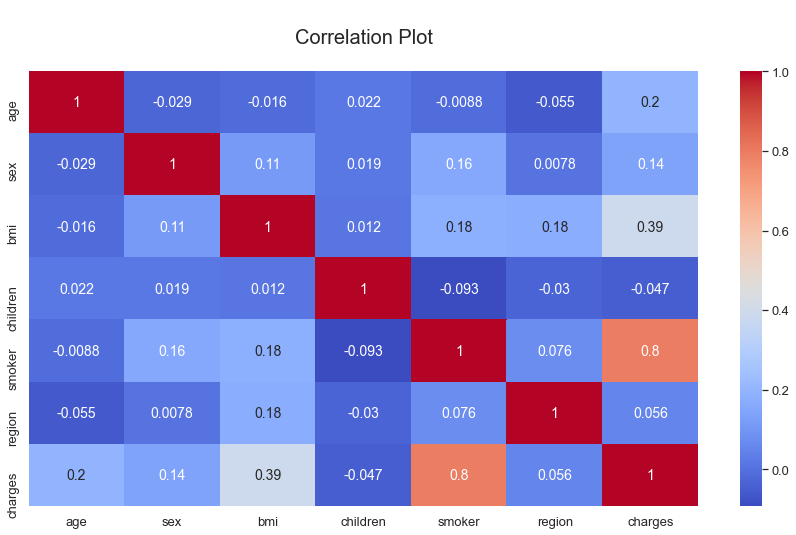

In [70]:
sns.set(rc={"font.size":14,"axes.titlesize":20,"axes.labelsize":15,"xtick.labelsize":13,"ytick.labelsize":13,
            "legend.fontsize":12})
plt.figure(figsize=(15,8))
sns.heatmap(new_smogn_df.corr(),annot=True,cmap="coolwarm")
plt.title("\nCorrelation Plot\n")
plt.show()

Here, smoker is more positively correlated to target variable after that bmi & age

<b>Defining Feature and Target Vaiable <b>

In [71]:
x1 = new_smogn_df[["smoker","bmi","age","sex","region"]]
y1 = new_smogn_df[["charges"]]

<b> Dataset spilting for training & testing purpose <b>

In [72]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.20,random_state=20)

<b>Import the Machine Learning Algorithm <b>

In [73]:
from sklearn.ensemble import GradientBoostingRegressor
model_2 =GradientBoostingRegressor(learning_rate=0.1,max_depth=2,n_estimators=100,random_state=20,subsample=0.9,
                                 min_samples_leaf=2,warm_start=True)

<b>Model training <b>

In [74]:
model_2.fit(x1_train,y1_train)

GradientBoostingRegressor(max_depth=2, min_samples_leaf=2, random_state=20,
                          subsample=0.9, warm_start=True)

<b> Model Prediction <b>

In [75]:
y_predict_2 = model_2.predict(x1_test)

<b> Evaluation of Model <b>

In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('\033[1m\nMean Absolute Error:',mean_absolute_error(y1_test,y_predict_2))
print("Mean Absolute Error tells you how close a regression line is to a set of points.")

print('\nMean Squared Error:',mean_squared_error(y1_test,y_predict_2))
print("Mean Squared Error is the amount of error in your measurements.")

print('\nr2_score:',r2_score(y1_test,y_predict_2))
print("r2_score is a statistical measure of how close the data are to the fitted regression line.")

print("\nRoot mean square error",np.sqrt(mean_absolute_error(y1_test,y_predict_2)))
print('root mean square error is a standard way to measure the error of a model in predicting quantitative data.')


Mean Absolute Error: 4924.2315605015365
Mean Absolute Error tells you how close a regression line is to a set of points.

Mean Squared Error: 42477616.55717759
Mean Squared Error is the amount of error in your measurements.

r2_score: 0.7997933512102242
r2_score is a statistical measure of how close the data are to the fitted regression line.

Root mean square error 70.17286911977831
root mean square error is a standard way to measure the error of a model in predicting quantitative data.


<b>r2_score for training model <b>

In [77]:
y_predict_train2 = model_2.predict(x1_train)
r2_score(y1_train,y_predict_train2)

0.8601529728373274

<b>r2_score for testing model <b>

In [78]:
y_predict_test2 = model_2.predict(x1_test)
r2_score(y1_test,y_predict_test2)

0.7997933512102242

<b>Prediction of Model for target variable<b>

In [79]:
df_smogn["predict_2"] = model_2.predict(x1)
df_smogn.head(5)

,age,sex,bmi,children,smoker,region,charges,predict_2
0,49,male,23.897408,1,yes,southeast,22097.747317,25251.095500
1,41,male,25.789748,0,no,northwest,23163.643130,11244.132173
2,47,male,27.864836,1,yes,southwest,23652.842912,27168.025356
3,53,female,24.533868,0,no,southeast,24409.211627,18952.944419
4,50,male,23.262660,0,yes,southeast,26408.967451,24836.931948


<b> Checking error between predicted value & original value <b>

In [80]:
df_smogn["error"] = df_smogn["charges"] - df_smogn["predict_2"]
df_smogn.head(5)

,age,sex,bmi,children,smoker,region,charges,predict_2,error
0,49,male,23.897408,1,yes,southeast,22097.747317,25251.095500,-3153.348183
1,41,male,25.789748,0,no,northwest,23163.643130,11244.132173,11919.510956
2,47,male,27.864836,1,yes,southwest,23652.842912,27168.025356,-3515.182444
3,53,female,24.533868,0,no,southeast,24409.211627,18952.944419,5456.267208
4,50,male,23.262660,0,yes,southeast,26408.967451,24836.931948,1572.035503


<b> Checking adjusted r2_score <b>

In [81]:
import statsmodels.api as sm
model2 = sm.OLS(y1_train,x1_train).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.925
Model:                            OLS   Adj. R-squared (uncentered):              0.924
Method:                 Least Squares   F-statistic:                              2140.
Date:                Tue, 13 Apr 2021   Prob (F-statistic):                        0.00
Time:                        15:58:36   Log-Likelihood:                         -9129.3
No. Observations:                 876   AIC:                                  1.827e+04
Df Residuals:                     871   BIC:                                  1.829e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
smoker      2.299e+04    567.749     40.492      0.000    2.19e+04    2.41e+04
bmi          304.8079     29.994     10.162      0.000     245.940     363.676
age          129.1447     17.904      7.213      0.000      94.004     164.285
sex         -802.5984    563.501     -1.424      0.155   -1908.577     303.381
region      -694.8069    258.414     -2.689      0.007   -1201.994    -187.620
==============================================================================
Omnibus:                       35.007   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.760
Skew:                           0.266   Prob(JB):                     1.14e-05
Kurtosis:                       2.416   Cond. No.                         116.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Now again we tried new approach i.e. dummies method approach

In [82]:
df1 = pd.get_dummies(df1)
df1.head(5)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


<b> Checking the outlier in dataset <b>


                                                      Checking Outlier in df1                                                      



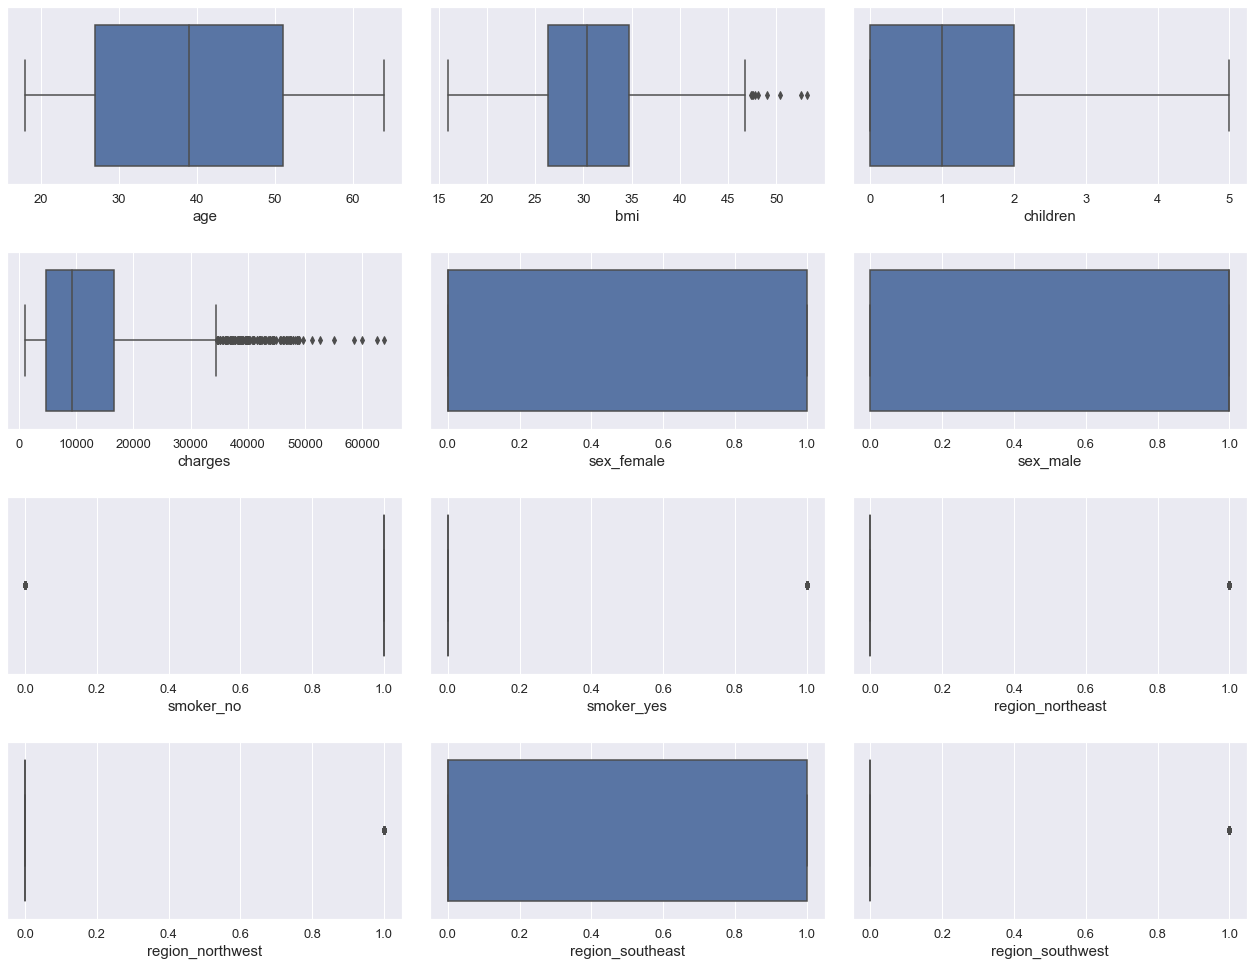

In [83]:
plt.figure(figsize=(18,14))
sns.set_style("darkgrid")
txt = "Checking Outlier in df1"
x = txt.center(131)
print(f"\033[1m\n{x}\n")
for index,cols in enumerate(df1):
    plt.subplot(4,3,index+1)
    sns.boxplot(df1.loc[:,cols])
plt.tight_layout(pad=2)

<b> Checking the correlation between the feature & target variable <b>

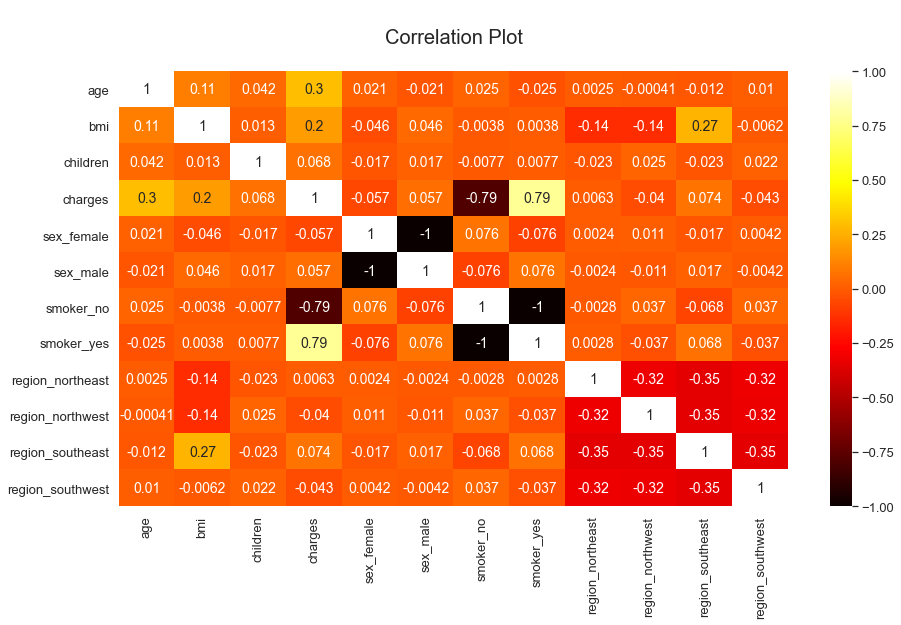

In [84]:
sns.set(rc={"font.size":14,"axes.titlesize":20,"axes.labelsize":15,"xtick.labelsize":13,"ytick.labelsize":13,
            "legend.fontsize":12})
plt.figure(figsize=(15,8))
sns.heatmap(df1.corr(),annot=True,cmap="hot")
plt.title("\nCorrelation Plot\n")
plt.show()

Here we select only positive correlation feature

<b> Defining feature selection & target variable <b>

In [85]:
x2 = df1[['age', 'bmi', 'children', 'sex_male','smoker_yes', 'region_northeast','region_southeast',
          'region_northwest','region_southwest']]

y2 = df1[["charges"]]

<b> Dataset splitting for training & testing purpose <b>

In [86]:
from sklearn.model_selection import train_test_split
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size=0.40,random_state=20)

<b> Importing Machine Learning Model <b>

In [87]:
from sklearn.ensemble import GradientBoostingRegressor
model_3 =GradientBoostingRegressor(learning_rate=0.1,max_depth=2,n_estimators=100,random_state=20,subsample=0.9,
                                 min_samples_leaf=2,warm_start=True)

<b> Model Training <b>

In [88]:
model_3.fit(x2_train,y2_train)

GradientBoostingRegressor(max_depth=2, min_samples_leaf=2, random_state=20,
                          subsample=0.9, warm_start=True)

<b> Model Prediction <b>

In [89]:
y_predict_3 = model_3.predict(x2_test)

<b>Evaluation Of model<b>

In [90]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('\033[1m\nMean Absolute Error:',mean_absolute_error(y2_test,y_predict_3))
print("Mean Absolute Error tells you how close a regression line is to a set of points.")

print('\nMean Squared Error:',mean_squared_error(y2_test,y_predict_3))
print("Mean Squared Error is the amount of error in your measurements.")

print('\nr2_score:',r2_score(y2_test,y_predict_3))
print("r2_score is a statistical measure of how close the data are to the fitted regression line.")

print("\nRoot mean square error",np.sqrt(mean_absolute_error(y2_test,y_predict_3)))
print('root mean square error is a standard way to measure the error of a model in predicting quantitative data.')


Mean Absolute Error: 2475.766209648189
Mean Absolute Error tells you how close a regression line is to a set of points.

Mean Squared Error: 19405669.54397837
Mean Squared Error is the amount of error in your measurements.

r2_score: 0.8735506435306999
r2_score is a statistical measure of how close the data are to the fitted regression line.

Root mean square error 49.75707195613694
root mean square error is a standard way to measure the error of a model in predicting quantitative data.


<b>r2_score for training model <b>

In [91]:
y_predict_train3 = model_3.predict(x2_train)
r2_score(y2_train,y_predict_train3)

0.8785652368295466

<b>r2_score for testing model <b>

In [92]:
y_predict_test3 = model_3.predict(x2_test)
r2_score(y2_test,y_predict_test3)

0.8735506435306999

<b>Prediction of Model for target variable<b>

In [93]:
df1["predict_3"] = model_3.predict(x2)
df1.head(5)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,predict_3
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1,16985.671901
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0,4454.244616
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0,7308.572334
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0,6616.576303
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0,4881.089423


<b> Checking error between predicted value & original value <b>

In [94]:
df1["error"] = df1["charges"] - df1["predict_3"]
df1.head(5)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,predict_3,error
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1,16985.671901,-100.747901
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0,4454.244616,-2728.692316
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0,7308.572334,-2859.110334
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0,6616.576303,15367.894307
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0,4881.089423,-1014.234223


<b>Checking adjusted r2_score <b>

In [95]:
import statsmodels.api as sm
model3 = sm.OLS(y2_train,x2_train).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     281.0
Date:                Tue, 13 Apr 2021   Prob (F-statistic):          1.43e-225
Time:                        15:58:42   Log-Likelihood:                -8125.9
No. Observations:                 802   AIC:                         1.627e+04
Df Residuals:                     793   BIC:                         1.631e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                248.6953     15.638     15.904      0.000     217.999     279.391
bmi                316.2912     38.065      8.309      0.000     241.571     391.012
children           584.1010    182.546      3.200      0.001     225.770     942.432
sex_male           353.5778    433.649      0.815      0.415    -497.657    1204.813
smoker_yes        2.341e+04    538.381     43.490      0.000    2.24e+04    2.45e+04
region_northeast -1.125e+04   1326.376     -8.484      0.000   -1.39e+04   -8649.054
region_southeast -1.186e+04   1426.554     -8.311      0.000   -1.47e+04   -9056.074
region_northwest  -1.17e+04   1321.808     -8.854      0.000   -1.43e+04   -9108.732
region_southwest -1.228e+04   1360.902     -9.026      0.000    -1.5e+04   -9612.109
==============================================================================
Omnibus:                      198.763   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              489.955
Skew:                           1.291   Prob(JB):                    4.05e-107
Kurtosis:                       5.828   Cond. No.                         617.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Again we tried new concept of developing model i.e auto-scikit learn which suggest best model according to dataset with hypertune parameter

### 1) GradientBoostingRegressor
### 2) RandomForestRegressor

### GradientBoostingRegressor 

<b> Label Encoding for new_df1 which is copy of original dataset <b>

In [96]:
new_df1[['sex', 'smoker', 'region']] = new_df1[['sex', 'smoker', 'region']].apply(label.fit_transform)
new_df1.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


#### Defining feature & target variable

In [97]:
x3 = new_df1[['age', 'bmi', "smoker"]]
           
y3 = new_df1[['charges']]

<b> Spilting the data into train and test purpose <b>

In [98]:
from sklearn.model_selection import train_test_split
x3_train,x3_test,y3_train,y3_test = train_test_split(x3,y3,test_size=0.20,random_state=20)

<b> ML algorithm selection <b>

In [99]:
from sklearn.ensemble import GradientBoostingRegressor
model_4 =GradientBoostingRegressor(learning_rate=0.03269357604116943, loss='ls',random_state=20,
                                 max_depth=None,max_leaf_nodes=32,min_samples_leaf=14) 

<b> Model Training <b>

In [100]:
model_4.fit(x3_train,y3_train)

GradientBoostingRegressor(learning_rate=0.03269357604116943, max_depth=None,
                          max_leaf_nodes=32, min_samples_leaf=14,
                          random_state=20)

<b>Model prediction <b>

In [101]:
y_predict_4 = model_4.predict(x3_test)

<b> Evaluation of Model <b>

In [102]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('\033[1m\nMean Absolute Error:',mean_absolute_error(y3_test,y_predict_4))
print("Mean Absolute Error tells you how close a regression line is to a set of points.")

print('\nMean Squared Error:',mean_squared_error(y3_test,y_predict_4))
print("Mean Squared Error is the amount of error in your measurements.")

print('\nr2_score:',r2_score(y3_test,y_predict_4))
print("r2_score is a statistical measure of how close the data are to the fitted regression line.")

print("\nRoot mean square error",np.sqrt(mean_absolute_error(y3_test,y_predict_4)))
print('root mean square error is a standard way to measure the error of a model in predicting quantitative data.')


Mean Absolute Error: 2577.9308412819687
Mean Absolute Error tells you how close a regression line is to a set of points.

Mean Squared Error: 16408874.184857216
Mean Squared Error is the amount of error in your measurements.

r2_score: 0.8884779462041632
r2_score is a statistical measure of how close the data are to the fitted regression line.

Root mean square error 50.77332805008914
root mean square error is a standard way to measure the error of a model in predicting quantitative data.


<b>r2_score for training model <b>

In [103]:
y_predict_train4 = model_4.predict(x3_train)
r2_score(y3_train,y_predict_train4)

0.8925529575932416

<b>r2_score for testing model<b>

In [104]:
y_predict_test4 = model_4.predict(x3_test)
r2_score(y3_test,y_predict_test4)

0.8884779462041632

<b>Prediction of Model for target variable<b>

In [105]:
new_df1["predict_4"] = model_4.predict(x3)
new_df1.head(5)

,age,sex,bmi,children,smoker,region,charges,predict_4
0,19,0,27.900,0,1,3,16884.92400,17752.957430
1,18,1,33.770,1,0,2,1725.55230,4154.885444
2,28,1,33.000,3,0,2,4449.46200,7173.171173
3,33,1,22.705,0,0,1,21984.47061,10315.546218
4,32,1,28.880,0,0,1,3866.85520,4473.934832


<b> Checking error between predicted value & original value <b>

In [106]:
new_df1["error"] = new_df1["charges"] - new_df1["predict_4"]
new_df1.head(5)

,age,sex,bmi,children,smoker,region,charges,predict_4,error
0,19,0,27.900,0,1,3,16884.92400,17752.957430,-868.033430
1,18,1,33.770,1,0,2,1725.55230,4154.885444,-2429.333144
2,28,1,33.000,3,0,2,4449.46200,7173.171173,-2723.709173
3,33,1,22.705,0,0,1,21984.47061,10315.546218,11668.924392
4,32,1,28.880,0,0,1,3866.85520,4473.934832,-607.079632


<b>Checking adjusted r2_score <b>

In [107]:
import statsmodels.api as sm
model4 = sm.OLS(y3_train,x3_train).fit()
model4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.867
Model:                            OLS   Adj. R-squared (uncentered):              0.866
Method:                 Least Squares   F-statistic:                              2311.
Date:                Tue, 13 Apr 2021   Prob (F-statistic):                        0.00
Time:                        15:58:43   Log-Likelihood:                         -10907.
No. Observations:                1069   AIC:                                  2.182e+04
Df Residuals:                    1066   BIC:                                  2.183e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          188.7005     13.265     14.225      0.000     162.671     214.730
bmi           50.5251     17.772      2.843      0.005      15.653      85.397
smoker      2.302e+04    491.504     46.827      0.000    2.21e+04     2.4e+04
==============================================================================
Omnibus:                      210.949   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              420.936
Skew:                           1.140   Prob(JB):                     3.94e-92
Kurtosis:                       5.063   Cond. No.                         125.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### RandomForestRegressor

<b> Label Encoding for new_df2 which is copy of original dataset <b>

In [108]:
new_df2[['sex', 'smoker', 'region']] = new_df2[['sex', 'smoker', 'region']].apply(label.fit_transform)
new_df2.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


#### Defining feature & target variables

In [109]:
x4 = new_df1[['age', 'bmi', "smoker"]]
           
y4 = new_df1[['charges']]

<b> Spilting the data into train and test purpose <b>

In [110]:
from sklearn.model_selection import train_test_split
x4_train,x4_test,y4_train,y4_test = train_test_split(x4,y4,test_size=0.23,random_state=20)

<b> ML algorithm selection <b>

In [111]:
from sklearn.ensemble import RandomForestRegressor
model_5 =RandomForestRegressor(max_features=0.9234161475923298,max_leaf_nodes=None,min_impurity_decrease=0.0, 
                               min_samples_leaf=6,min_samples_split=13,min_weight_fraction_leaf=0.0) 

<b> Model training <b>

In [112]:
model_5.fit(x4_train,y4_train)

RandomForestRegressor(max_features=0.9234161475923298, min_samples_leaf=6,
                      min_samples_split=13)

<b>Model prediction <b>

In [113]:
y_predict_5 = model_5.predict(x4_test)

<b>Evaluation of model <b>

In [114]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('\033[1m\nMean Absolute Error:',mean_absolute_error(y4_test,y_predict_5))
print("Mean Absolute Error tells you how close a regression line is to a set of points.")

print('\nMean Squared Error:',mean_squared_error(y4_test,y_predict_5))
print("Mean Squared Error is the amount of error in your measurements.")

print('\nr2_score:',r2_score(y4_test,y_predict_5))
print("r2_score is a statistical measure of how close the data are to the fitted regression line.")

print("\nRoot mean square error",np.sqrt(mean_absolute_error(y4_test,y_predict_5)))
print('root mean square error is a standard way to measure the error of a model in predicting quantitative data.')


Mean Absolute Error: 2445.4636544011346
Mean Absolute Error tells you how close a regression line is to a set of points.

Mean Squared Error: 16802855.016093355
Mean Squared Error is the amount of error in your measurements.

r2_score: 0.8847658692859908
r2_score is a statistical measure of how close the data are to the fitted regression line.

Root mean square error 49.45162944131502
root mean square error is a standard way to measure the error of a model in predicting quantitative data.


<b>r2_score for training model <b>

In [115]:
y_predict_train5 = model_5.predict(x4_train)
r2_score(y4_train,y_predict_train5)

0.8865455138173229

<b>r2_score for testing model <b>

In [116]:
y_predict_test5 = model_5.predict(x4_test)
r2_score(y4_test,y_predict_test5)

0.8847658692859908

<b> Prediction of Model for traget variable <b>

In [117]:
new_df2["predict_5"] = model_4.predict(x4)
new_df2.head(5)

,age,sex,bmi,children,smoker,region,charges,predict_5
0,19,0,27.900,0,1,3,16884.92400,17752.957430
1,18,1,33.770,1,0,2,1725.55230,4154.885444
2,28,1,33.000,3,0,2,4449.46200,7173.171173
3,33,1,22.705,0,0,1,21984.47061,10315.546218
4,32,1,28.880,0,0,1,3866.85520,4473.934832


<b> Checking error between predicted value & original value <b>

In [118]:
new_df2["error"] = new_df2["charges"] - new_df2["predict_5"]
new_df2.head(5)

,age,sex,bmi,children,smoker,region,charges,predict_5,error
0,19,0,27.900,0,1,3,16884.92400,17752.957430,-868.033430
1,18,1,33.770,1,0,2,1725.55230,4154.885444,-2429.333144
2,28,1,33.000,3,0,2,4449.46200,7173.171173,-2723.709173
3,33,1,22.705,0,0,1,21984.47061,10315.546218,11668.924392
4,32,1,28.880,0,0,1,3866.85520,4473.934832,-607.079632


<b> Checking adjusted r2_score <b>

In [119]:
import statsmodels.api as sm
model5 = sm.OLS(y4_train,x4_train).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.867
Model:                            OLS   Adj. R-squared (uncentered):              0.867
Method:                 Least Squares   F-statistic:                              2228.
Date:                Tue, 13 Apr 2021   Prob (F-statistic):                        0.00
Time:                        15:58:43   Log-Likelihood:                         -10497.
No. Observations:                1029   AIC:                                  2.100e+04
Df Residuals:                    1026   BIC:                                  2.101e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          186.5745     13.608     13.710      0.000     159.871     213.278
bmi           51.8539     18.166      2.854      0.004      16.207      87.501
smoker      2.304e+04    499.721     46.101      0.000    2.21e+04     2.4e+04
==============================================================================
Omnibus:                      206.416   Durbin-Watson:                   1.842
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              417.261
Skew:                           1.149   Prob(JB):                     2.47e-91
Kurtosis:                       5.110   Cond. No.                         125.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Comparing all model approaches, GradientBoostingRegressor (model_4) is well perform which suggest by the auto-scikit learn method

## Residual Plot

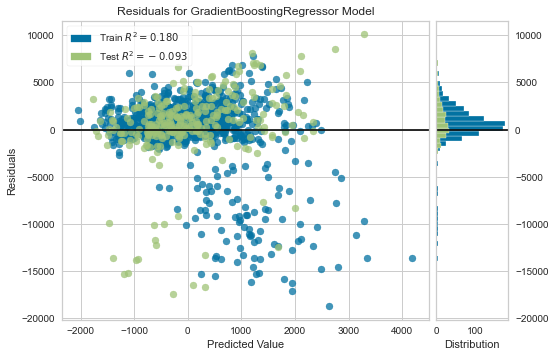

In [120]:
from yellowbrick.regressor import residuals_plot

# train test split
x3 = new_df1[['age', 'bmi', "smoker"]]
y3 = new_df1.iloc[:,-1]
from sklearn.model_selection import train_test_split
x3_train, x3_test, y3_train, y3_test = train_test_split(x3,y3,test_size=0.20,random_state=20)

# Create the visualizer, fit, score, and show it
model_4 =GradientBoostingRegressor(learning_rate=0.03269357604116943, loss='ls',random_state=20,
                                 max_depth=None,max_leaf_nodes=32,min_samples_leaf=14)

viz = residuals_plot(model_4, x3_train, y3_train, x3_test, y3_test)


## Residual Plot using regplot

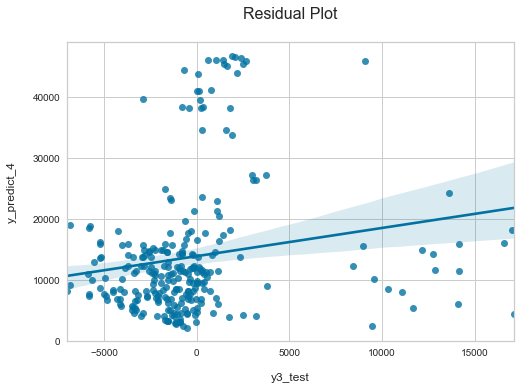

In [121]:
sns.regplot(y3_test,y_predict_4)
plt.title("Residual Plot\n",fontsize=16)
plt.xlabel("\ny3_test",fontsize=12)
plt.ylabel("y_predict_4\n",fontsize=12)
plt.show()

# Learning Curve

In [122]:
from sklearn.model_selection import learning_curve
train_sizes,train_score,test_scores=learning_curve(model_4,x3_train,y3_train,
                                                   cv=5,n_jobs=-1,train_sizes=np.linspace(0.01,1,200),verbose=1)

[learning_curve] Training set sizes: [  8  12  17  21  25  29  34  38  42  46  51  55  59  63  68  72  76  80
  85  89  93  97 102 106 110 114 119 123 127 131 136 140 144 148 153 157
 161 165 170 174 178 182 187 191 195 199 204 208 212 216 221 225 229 233
 238 242 246 251 255 259 263 268 272 276 280 285 289 293 297 302 306 310
 314 319 323 327 331 336 340 344 348 353 357 361 365 370 374 378 382 387
 391 395 399 404 408 412 416 421 425 429 433 438 442 446 450 455 459 463
 467 472 476 480 484 489 493 497 501 506 510 514 518 523 527 531 535 540
 544 548 553 557 561 565 570 574 578 582 587 591 595 599 604 608 612 616
 621 625 629 633 638 642 646 650 655 659 663 667 672 676 680 684 689 693
 697 701 706 710 714 718 723 727 731 735 740 744 748 752 757 761 765 769
 774 778 782 786 791 795 799 803 808 812 816 820 825 829 833 837 842 846
 850 855]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   31.1s finished


In [123]:
train_mean = np.mean(train_score,axis=1)

In [124]:
train_std = np.std(train_score,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)


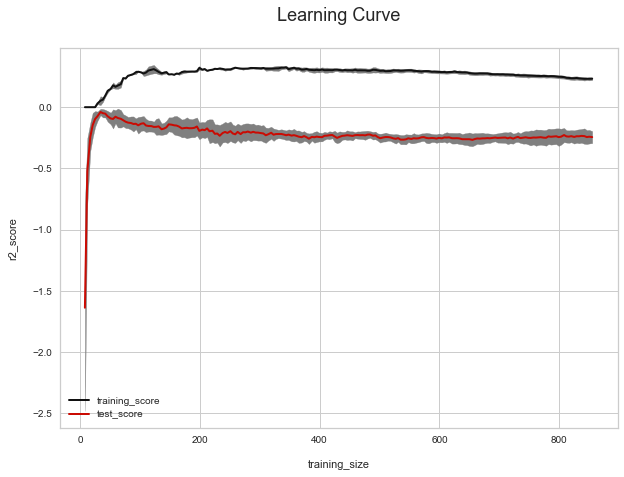

In [125]:
plt.figure(figsize=(10,7))
plt.plot(train_sizes,train_mean,label="training_score",linewidth=2,c="k")
plt.plot(train_sizes,test_mean,label="test_score",linewidth=2,c="r")
plt.fill_between(train_sizes,train_mean-train_std,train_mean+train_std,color="grey")
plt.fill_between(train_sizes,test_mean-test_std,test_mean+test_std,color="grey")
plt.title("Learning Curve\n",fontsize=18)
plt.xlabel("\ntraining_size")
plt.ylabel("r2_score\n")
plt.legend(loc="best")
plt.show()

# One mini project on Insurance cost prediction

In [126]:
def check_smoker():
    correct_val = False
    val_1=[]
    print("""\033[1m
    For smoker information \n
    yes == 1
    no == 0            
    """)
    smoker = int(input("Enter the smoker information as encoded: "))
    while not correct_val:
        if smoker in range(0,2):
            val_1.append(smoker)
            correct_val = True
        else:
            print("Invalid Code...!")
            smoker= int(input("\nEnter the smoker information as encoded: "))
            t = val_1.append(smoker)
    return val_1[-1]

age = int(input("\033[1mEnter your age : "))
bmi = float(input("Enter your bmi: "))

input_value = []

input_value.append([age,bmi,check_smoker()])

print(f"\nInsurance cost will be : Rs {model_4.predict(input_value)[0]}/- only")


Enter your age : 25
Enter your bmi: 185

    For smoker information 

    yes == 1
    no == 0            
    
Enter the smoker information as encoded: 1

Insurance cost will be : Rs 1687.5033514871714/- only
